In [1]:
# TensorFlow and tf.keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

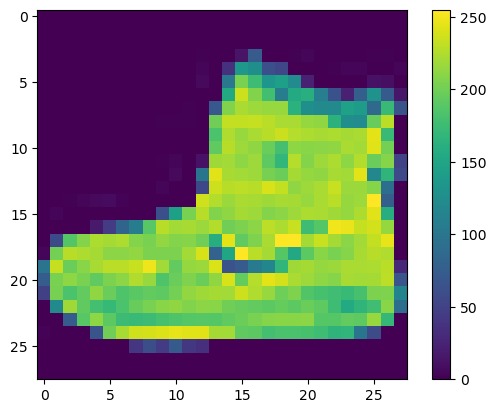

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

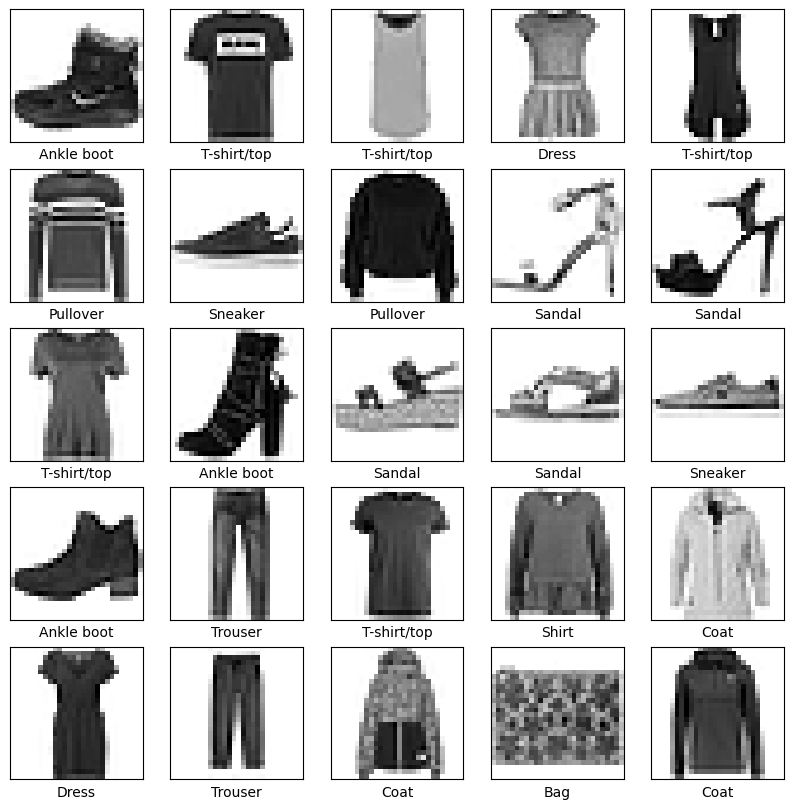

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4998 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3757 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3143 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2804 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2692 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2558 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2482 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3298 - accuracy: 0.8850 - 1s/epoch - 5ms/step

Test accuracy: 0.8849999904632568


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [18]:
predictions[0]

array([6.1621755e-08, 7.5191064e-10, 1.4745057e-08, 9.4816238e-11,
       4.6448552e-09, 1.0107138e-02, 4.3205639e-09, 1.0918224e-02,
       6.0700276e-09, 9.7897452e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

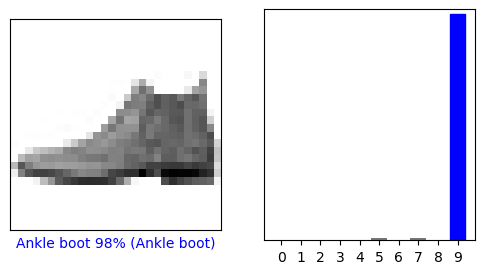

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

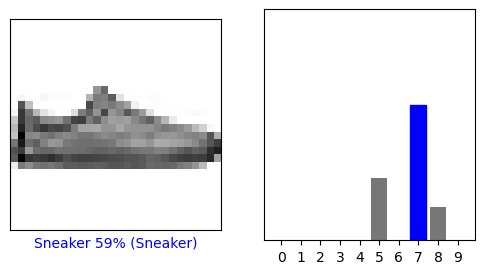

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

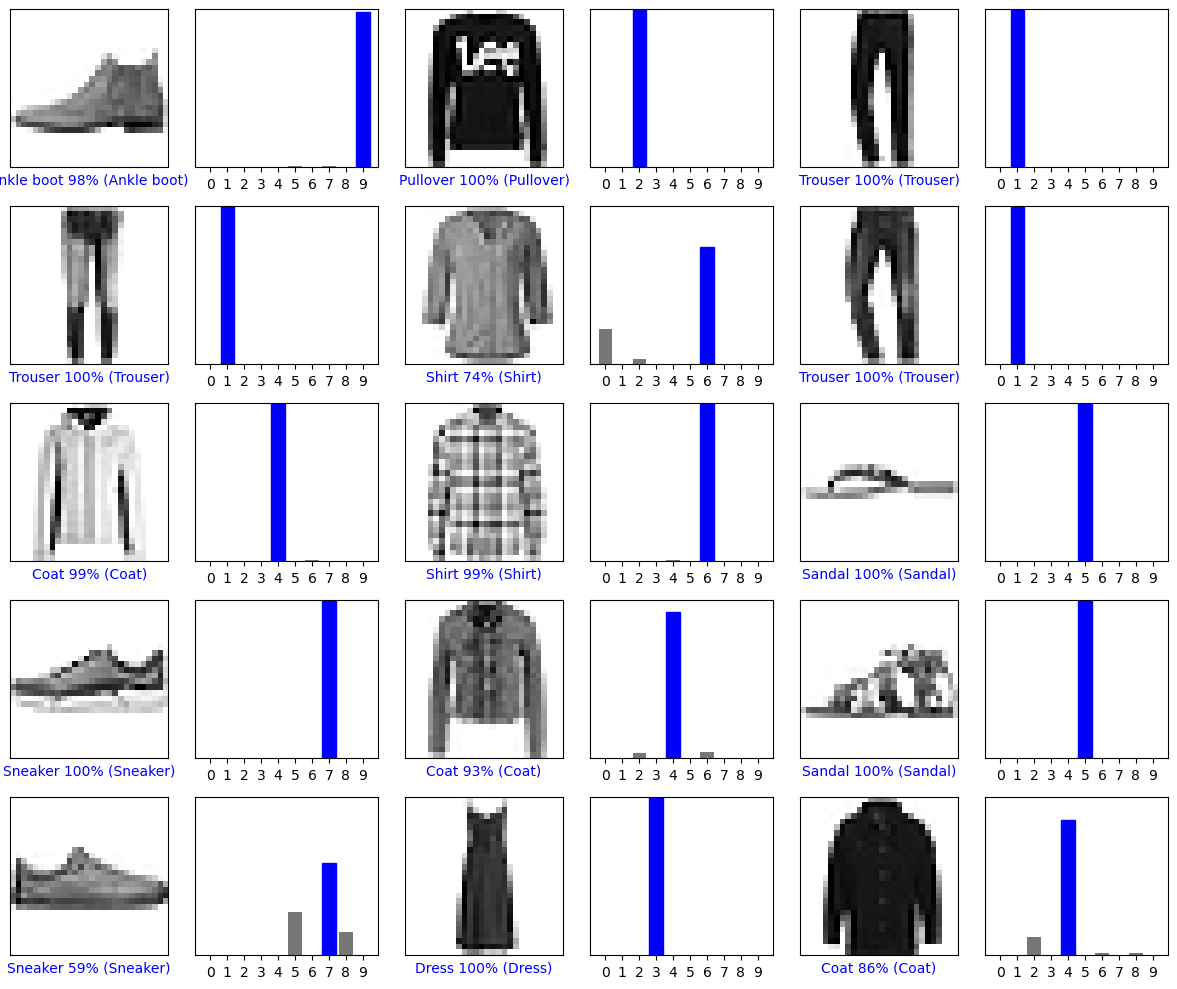

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 71ms/step
[[2.24473551e-05 2.31126888e-11 9.99644637e-01 2.67181112e-12
  2.32264560e-04 1.09352252e-08 1.00687306e-04 2.63205281e-17
  3.49926171e-10 8.75333484e-19]]


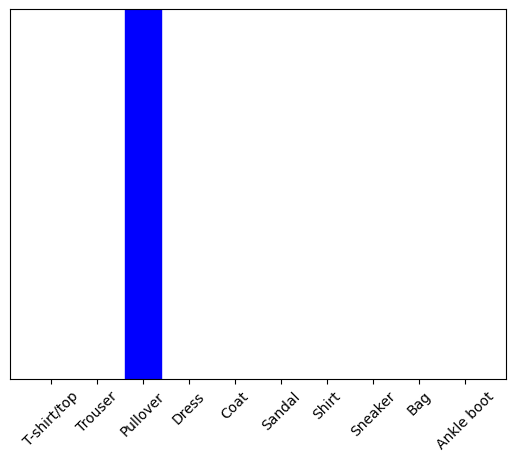

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2

In [33]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize the pixel values to a range of [0, 1]
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(train_images_normalized, train_labels)

# Make predictions on the test set
predictions = knn_classifier.predict(test_images_normalized)

# Evaluate the performance
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
class_report = classification_report(test_labels, predictions, target_names=class_names)
print('Classification Report:')
print(class_report)

Accuracy: 85.54%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.82      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.66      0.57      0.61      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [ ]:
Bonus Q.2: I have performed the KNN and MLP for the fashion MNIST dataset as the dataset size going to increase the performance of the  KNN is going to effect.
For the larger datasets implementing the KNN algorithm will take the much processing time.Though it taking much processing time also we are not able achieve the 
performance on the new data is not better than the dense layer networks.